# standard, min_max, robust 비교 고찰

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# data 
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

### StandardScaler
> sklearn.preprocessing.StandardScaler
* StandardScaler(*, copy=True, with_mean=True, with_std=True)

In [8]:
stan = StandardScaler()
stan_fit = stan.fit_transform(x)
stan_fit = pd.DataFrame(stan_fit, columns=['x1', 'x2'])

### MinMaxScaler
> sklearn.preprocessing.MinMaxScaler
* MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)

In [9]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df= pd.DataFrame(minmax_df,columns = ['x1','x2'])


### RobustScaler
> sklearn.preprocessing.RobustScaler
> 표준 정규화
* RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
* 중앙값을 제거하고 Quantile 범위 (기본값은 IQR : Interquartile Range)에 따라 데이터를 스케일링
* IQR = Q3 - Q1

In [10]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df= pd.DataFrame(robust_df, columns = ['x1','x2'])

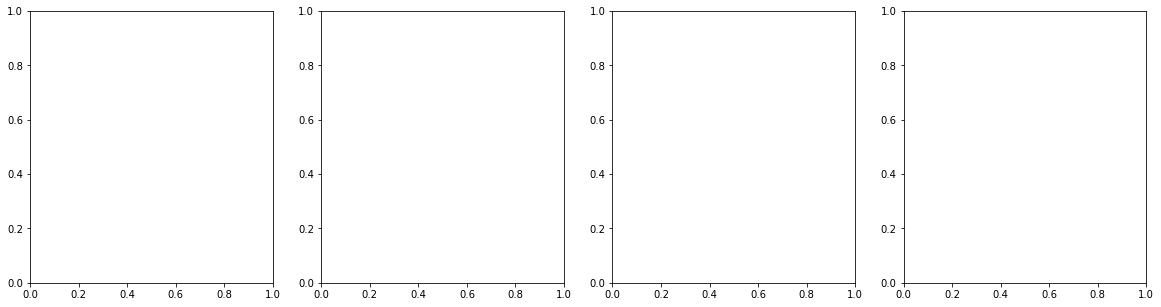

In [11]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols = 4, figsize = (20,5))

NameError: name 'standard_df' is not defined

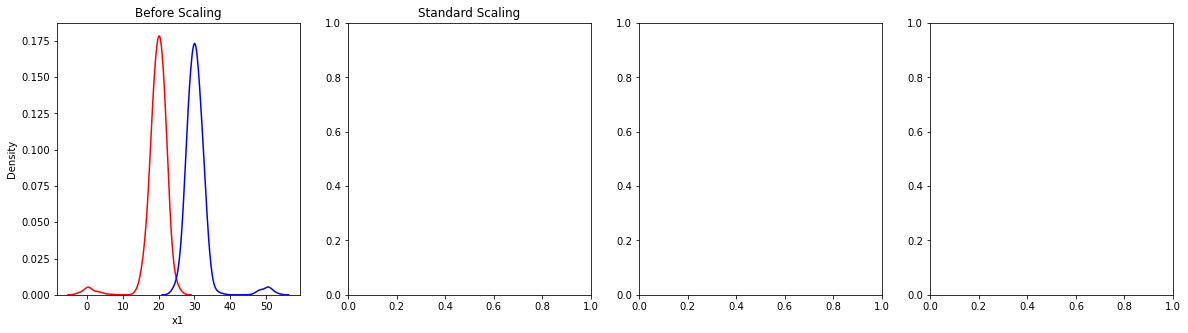

In [12]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols = 4, figsize = (20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1, color= 'red')
sns.kdeplot(x['x2'], ax = ax1, color= 'blue')

ax2.set_title('Standard Scaling')
sns.kdeplot(standard_df['x1'], ax = ax2, color= 'red')
sns.kdeplot(standard_df['x2'], ax = ax2, color= 'blue')

ax3.set_title('MinMax Scaling')
sns.kdeplot(minmax_df['x1'], ax = ax3, color= 'red')
sns.kdeplot(minmax_df['x2'], ax = ax3, color= 'blue')

ax4.set_title('Robust Scaling')
sns.kdeplot(robust_df['x1'], ax = ax4, color= 'red')
sns.kdeplot(robust_df['x2'], ax = ax4, color= 'blue')

plt.show()

##Rubust Scaling값이 표준화가 가장 효율적으로 되고 있는 것을 알 수 있다



# StandardScaler

StandardScaler(*, copy=True, with_mean=True, with_std=True)
평균과 분산으로 표준화 

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris_df)

iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

In [ ]:
scaler = StandardScaler()
stan_df = scaler.fit_transform(iris_scaled)
stan_df= pd.DataFrame(stan_df, columns=['sepal length','sepal width','petal length','petal width'])
stan_df

In [ ]:
sns.kdeplot(stan_df['sepal width'], shade=True)
sns.kdeplot(stan_df['petal width'], shade=True)
sns.kdeplot(stan_df['sepal length'], shade=True)
sns.kdeplot(stan_df['petal length'], shade=True)

# MinMaxScaler
MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)[source]
        데이터 값을 0에서 1사이에 어디에 가까운지 정해저 소수점 값으로 변환

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

iris_scaled = scaler.fit_transform(iris_df)

iris_df_mscaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature 들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature 들의 최대 값')
print(iris_df_scaled.max())

In [ ]:
sns.kdeplot(iris_df_scaled['sepal length (cm)'], color= 'red')
sns.kdeplot(iris_df_scaled['sepal width (cm)'], color= 'blue')
sns.kdeplot(iris_df_scaled['petal length (cm)'], color= 'green')
sns.kdeplot(iris_df_scaled['petal width (cm)'], color= 'black')

# RobustSclaer()
RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)


In [13]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

iris_scaled = scaler.fit_transform(iris_df)

iris_df_rbscaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

NameError: name 'iris_df' is not defined

In [14]:
sns.kdeplot(iris_df_scaled['sepal length (cm)'],shade=True)
sns.kdeplot(iris_df_scaled['sepal width (cm)'], shade=True)
sns.kdeplot(iris_df_scaled['petal length (cm)'], shade=True)
sns.kdeplot(iris_df_scaled['petal width (cm)'], shade=True)
plt.legend()
plt.show()

NameError: name 'iris_df_scaled' is not defined

NameError: name 'iris_df' is not defined

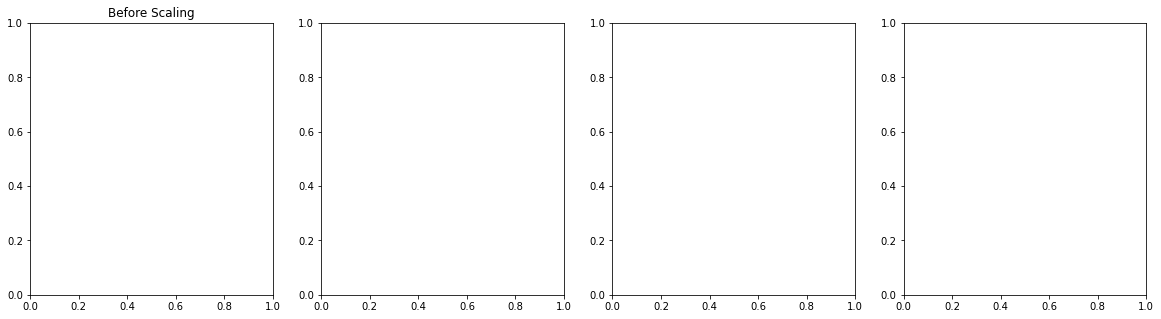

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(iris_df['sepal length (cm)'], ax = ax1, color = 'r',shade = True)
sns.kdeplot(iris_df['sepal width (cm)'], ax = ax1, color = 'y',shade = True)
sns.kdeplot(iris_df['petal length (cm)'], ax = ax1, color = 'g',shade = True)
sns.kdeplot(iris_df['petal width (cm)'], ax = ax1, color = 'b',shade = True)
ax2.set_title('Standard Scaling')
sns.kdeplot(iris_df_scaled['sepal length (cm)'], ax = ax2, color = 'r',shade = True)
sns.kdeplot(iris_df_scaled['sepal width (cm)'], ax = ax2, color = 'y',shade = True)
sns.kdeplot(iris_df_scaled['petal length (cm)'], ax = ax2, color = 'g',shade = True)
sns.kdeplot(iris_df_scaled['petal width (cm)'], ax = ax2, color = 'b',shade = True)
ax3.set_title('MinMax Scaling')
sns.kdeplot(iris_df_mscaled['sepal length (cm)'], ax = ax3, color = 'r',shade = True)
sns.kdeplot(iris_df_mscaled['sepal width (cm)'], ax = ax3, color = 'y',shade = True)
sns.kdeplot(iris_df_mscaled['petal length (cm)'], ax = ax3, color = 'g',shade = True)
sns.kdeplot(iris_df_mscaled['petal width (cm)'], ax = ax3, color = 'b',shade = True)
ax4.set_title('Robust Scaling')
sns.kdeplot(iris_df_rbscaled['sepal length (cm)'], ax = ax4, color = 'r',shade = True)
sns.kdeplot(iris_df_rbscaled['sepal width (cm)'], ax = ax4, color = 'y',shade = True)
sns.kdeplot(iris_df_rbscaled['petal length (cm)'], ax = ax4, color = 'g',shade = True)
sns.kdeplot(iris_df_rbscaled['petal width (cm)'], ax = ax4, color = 'b',shade = True)
plt.show()

# 데이터 전처리 아키텍쳐 구조
* 1) 타이타닉 csv 불러와 데이터프레임 처리
* 2) 필요없는 칼럼 삭제
* 3) 결측치 확인 후 처리
* 4) 정수가 아닌 데이터는 인코딩
* 5) 데이터 스케일링 실행(전체 실수변환 데이터 중 왜곡을 줄이기 위한 스케일링)
* 6) 이상치?


In [58]:
import pandas as pd
#1,2번
tanic = pd.read_csv('./csv/train.csv')
tanic = tanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin'], axis=1)
tanic.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [74]:
# 3번 결측치 처리
tanic['Age'] = tanic['Age'].fillna(tanic['Age'].mean())
tanic['Embarked'] = tanic['Embarked'].fillna('S')
tanic.isna().sum()


Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [60]:
# 4번 데이터 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
tanic['Sex'] = encoder.fit_transform(tanic['Sex'])
tanic['Embarked'] = encoder.fit_transform(tanic['Embarked'])
tanic


,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.000000,2
1,1,1,0,38.000000,0
2,1,3,0,26.000000,2
3,1,1,0,35.000000,2
4,0,3,1,35.000000,2
...,...,...,...,...,...
886,0,2,1,27.000000,2
887,1,1,0,19.000000,2
888,0,3,0,29.699118,2
889,1,1,1,26.000000,0


# 데이터 스케일링 없이 처리

In [75]:
#5 데이터 
import pandas as pd
print('tanic 데이터의 평균 값')
print(tanic.mean())
print('\ntanic 데이터의 분산 값')
print(tanic.var())


tanic 데이터의 평균 값
Survived     0.383838
Pclass       2.308642
Sex          0.647587
Age         29.699118
Embarked     1.536476
dtype: float64

tanic 데이터의 분산 값
Survived      0.236772
Pclass        0.699015
Sex           0.228475
Age         169.052400
Embarked      0.626477
dtype: float64


# 데이터 스케일링 1번 StandardScaler

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

tanic_columns = tanic.columns
tanic_scaled = scaler.fit_transform(tanic)

tanic_df_scaled = pd.DataFrame(data = tanic_scaled,columns=tanic_columns)
print('feature 들의 평균 값')
print(tanic_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(tanic_df_scaled.var())

feature 들의 평균 값
Survived   -2.287732e-16
Pclass     -2.031048e-16
Sex        -4.059603e-16
Age         2.562796e-16
Embarked    1.556306e-16
dtype: float64

feature 들의 분산 값
Survived    1.001124
Pclass      1.001124
Sex         1.001124
Age         1.001124
Embarked    1.001124
dtype: float64


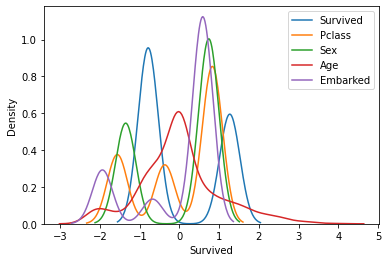

In [72]:
sns.kdeplot(tanic_df_scaled['Survived'])
sns.kdeplot(tanic_df_scaled['Pclass'])
sns.kdeplot(tanic_df_scaled['Sex'])
sns.kdeplot(tanic_df_scaled['Age'])
sns.kdeplot(tanic_df_scaled['Embarked'])
plt.legend(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked'])
plt.show()

feature들의 평균 값
Survived   -2.287732e-16
Pclass     -2.031048e-16
Sex        -4.059603e-16
Age         2.562796e-16
Embarked    1.556306e-16
dtype: float64

feature 들의 분산 값
Survived    1.001124
Pclass      1.001124
Sex         1.001124
Age         1.001124
Embarked    1.001124
dtype: float64


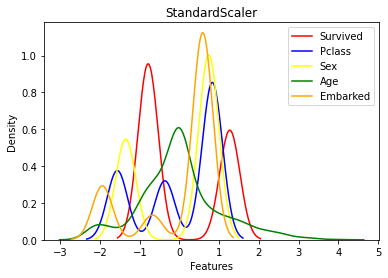

In [71]:
# StandardScaler
sscaler = StandardScaler()

sscaler.fit(tanic)
titanic_scaled = sscaler.fit_transform(tanic)

titanic_df_scaled = pd.DataFrame(data= titanic_scaled, columns=tanic.columns)

print('feature들의 평균 값')
print(titanic_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(titanic_df_scaled.var())

fig = plt.plot(figsize=(20,5))

sns.kdeplot(titanic_df_scaled['Survived'], color='red')
sns.kdeplot(titanic_df_scaled['Pclass'], color='blue')
sns.kdeplot(titanic_df_scaled['Sex'], color='yellow')
sns.kdeplot(titanic_df_scaled['Age'], color='green')
sns.kdeplot(titanic_df_scaled['Embarked'], color='orange')

plt.title('StandardScaler')

plt.xlabel('Features')
plt.legend(['Survived','Pclass', 'Sex', 'Age', 'Embarked'])
plt.show()

# 데이터스케일링 2번 MinMaxSclaer

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

tanic_columns = tanic.columns
tanic_scaled = scaler.fit_transform(tanic)

tanic_df_Mscaled = pd.DataFrame(data = tanic_scaled,columns=tanic_columns)
print('feature 들의 최대값')
print(tanic_df_Mscaled.max())
print('\nfeature 들의 최소값')
print(tanic_df_Mscaled.min())

feature 들의 최대값
Survived    1.0
Pclass      1.0
Sex         1.0
Age         1.0
Embarked    1.0
dtype: float64

feature 들의 최소값
Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
Embarked    0.0
dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


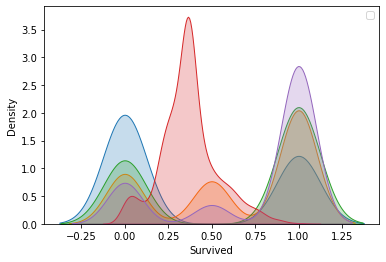

In [78]:
sns.kdeplot(tanic_df_Mscaled['Survived'],shade=True)
sns.kdeplot(tanic_df_Mscaled['Pclass'], shade=True)
sns.kdeplot(tanic_df_Mscaled['Sex'], shade=True)
sns.kdeplot(tanic_df_Mscaled['Age'], shade=True)
sns.kdeplot(tanic_df_Mscaled['Embarked'], shade=True)
plt.legend()
plt.show()

# 데이터스케일링 3번 Robusterscaler

In [79]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

tanic_columns = tanic.columns
tanic_scaled = scaler.fit_transform(tanic)

tanic_df_roscaled = pd.DataFrame(data = tanic_scaled,columns=tanic_columns)
print('feature 들의 평균 값')
print(tanic_df_roscaled.mean())
print('\nfeature 들의 분산값')
print(tanic_df_roscaled.var())

feature 들의 평균 값
Survived    3.838384e-01
Pclass     -6.913580e-01
Sex        -3.524130e-01
Age         1.996159e-16
Embarked   -4.635241e-01
dtype: float64

feature 들의 분산값
Survived    0.236772
Pclass      0.699015
Sex         0.228475
Age         1.000310
Embarked    0.626477
dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


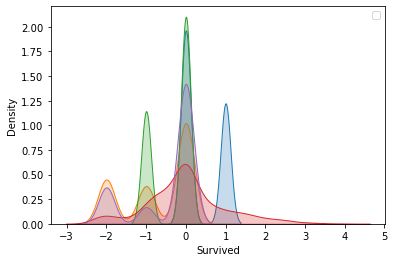

In [80]:
sns.kdeplot(tanic_df_roscaled['Survived'],shade=True)
sns.kdeplot(tanic_df_roscaled['Pclass'], shade=True)
sns.kdeplot(tanic_df_roscaled['Sex'], shade=True)
sns.kdeplot(tanic_df_roscaled['Age'], shade=True)
sns.kdeplot(tanic_df_roscaled['Embarked'], shade=True)
plt.legend()
plt.show()

In [81]:
tanic_df_roscaled

,Survived,Pclass,Sex,Age,Embarked
0,0.0,0.0,0.0,-0.592240,0.0
1,1.0,-2.0,-1.0,0.638529,-2.0
2,1.0,0.0,-1.0,-0.284548,0.0
3,1.0,-2.0,-1.0,0.407760,0.0
4,0.0,0.0,0.0,0.407760,0.0
...,...,...,...,...,...
886,0.0,-1.0,0.0,-0.207624,0.0
887,1.0,-2.0,-1.0,-0.823009,0.0
888,0.0,0.0,-1.0,0.000000,0.0
889,1.0,-2.0,0.0,-0.284548,-2.0


# 전체 맵을 보고 필요한 데이터 찾아보기

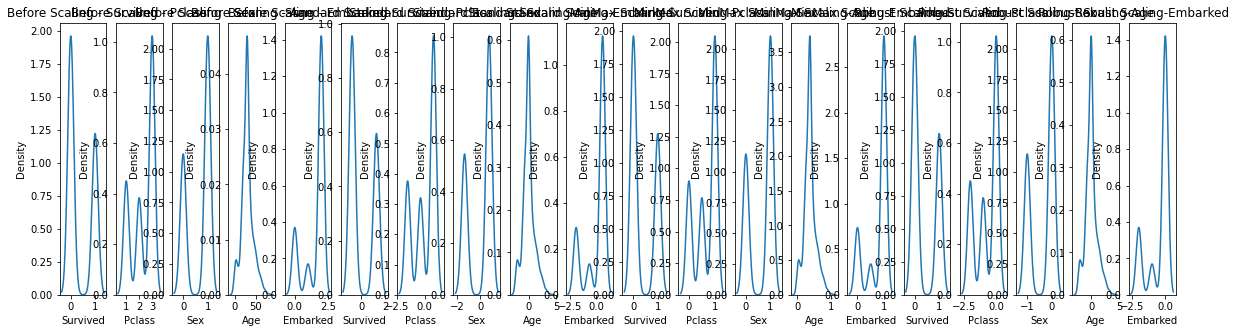

In [67]:
fig, (ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20) = plt.subplots(ncols=20, figsize=(20,5))
ax1.set_title('Before Scaling - Survived')
sns.kdeplot(tanic['Survived'], ax = ax1)
ax2.set_title('Before Scaling - Pclass')
sns.kdeplot(tanic['Pclass'], ax = ax2)
ax3.set_title('Before Scaling - Sex')
sns.kdeplot(tanic['Sex'], ax = ax3)
ax4.set_title('Before Scaling - Age')
sns.kdeplot(tanic['Age'], ax = ax4)
ax5.set_title('Before Scaling - Embarked')
sns.kdeplot(tanic['Embarked'], ax = ax5)

ax6.set_title('Standard Scaling-Survived')
sns.kdeplot(tanic_df_scaled['Survived'],ax = ax6)
ax7.set_title('Standard Scaling-Pclass')
sns.kdeplot(tanic_df_scaled['Pclass'], ax = ax7)
ax8.set_title('Standard Scaling-Sex')
sns.kdeplot(tanic_df_scaled['Sex'], ax = ax8)
ax9.set_title('Standard Scaling-Age')
sns.kdeplot(tanic_df_scaled['Age'], ax = ax9)
ax10.set_title('Standard Scaling-Embarked')
sns.kdeplot(tanic_df_scaled['Embarked'],ax = ax10)

ax11.set_title('MinMax Scaling-Survived')
sns.kdeplot(tanic_df_Mscaled['Survived'],ax = ax11)
ax12.set_title('MinMax Scaling-Pclass')
sns.kdeplot(tanic_df_Mscaled['Pclass'], ax = ax12)
ax13.set_title('MinMax Scaling-Sex')
sns.kdeplot(tanic_df_Mscaled['Sex'], ax = ax13)
ax14.set_title('MinMax Scaling-Age')
sns.kdeplot(tanic_df_Mscaled['Age'], ax = ax14)
ax15.set_title('MinMax Scaling-Embarked')
sns.kdeplot(tanic_df_Mscaled['Embarked'], ax =ax15)

ax16.set_title('Robust Scaling-Survived')
sns.kdeplot(tanic_df_roscaled['Survived'],ax = ax16)
ax17.set_title('Robust Scaling-Pclass')
sns.kdeplot(tanic_df_roscaled['Pclass'], ax = ax17)
ax18.set_title('Robust Scaling-Sex')
sns.kdeplot(tanic_df_roscaled['Sex'],  ax = ax18)
ax19.set_title('Robust Scaling-Age')
sns.kdeplot(tanic_df_roscaled['Age'], ax = ax19)
ax20.set_title('Robust Scaling-Embarked')
sns.kdeplot(tanic_df_roscaled['Embarked'],ax = ax20)

plt.show()

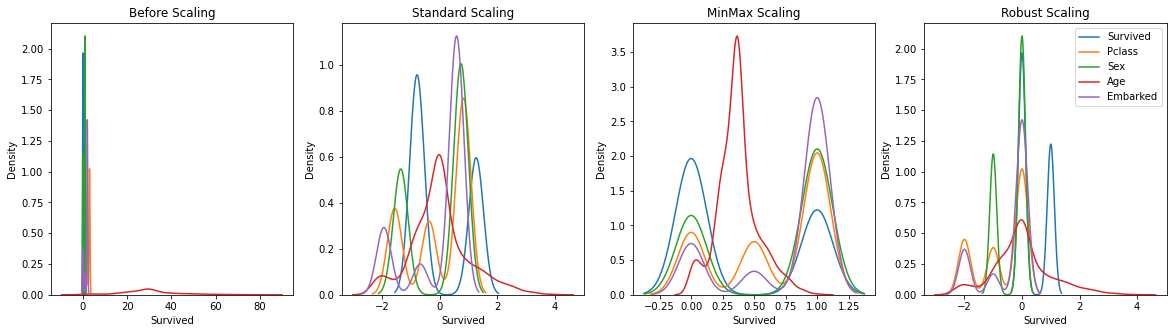

In [68]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(tanic['Survived'], ax = ax1)
sns.kdeplot(tanic['Pclass'], ax = ax1)
sns.kdeplot(tanic['Sex'], ax = ax1)
sns.kdeplot(tanic['Age'], ax = ax1)
sns.kdeplot(tanic['Embarked'], ax = ax1)
plt.legend(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked'])


ax2.set_title('Standard Scaling')
sns.kdeplot(tanic_df_scaled['Survived'],ax = ax2)
sns.kdeplot(tanic_df_scaled['Pclass'], ax = ax2)
sns.kdeplot(tanic_df_scaled['Sex'], ax = ax2)
sns.kdeplot(tanic_df_scaled['Age'], ax = ax2)
sns.kdeplot(tanic_df_scaled['Embarked'],ax = ax2)



ax3.set_title('MinMax Scaling')
sns.kdeplot(tanic_df_Mscaled['Survived'],ax = ax3)
sns.kdeplot(tanic_df_Mscaled['Pclass'], ax = ax3)
sns.kdeplot(tanic_df_Mscaled['Sex'], ax = ax3)
sns.kdeplot(tanic_df_Mscaled['Age'], ax = ax3)
sns.kdeplot(tanic_df_Mscaled['Embarked'], ax =ax3)
plt.legend(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked'])


ax4.set_title('Robust Scaling')

sns.kdeplot(tanic_df_roscaled['Survived'],ax = ax4)
sns.kdeplot(tanic_df_roscaled['Pclass'], ax = ax4)
sns.kdeplot(tanic_df_roscaled['Sex'],  ax = ax4)
sns.kdeplot(tanic_df_roscaled['Age'], ax = ax4)
sns.kdeplot(tanic_df_roscaled['Embarked'],ax = ax4)
plt.legend(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked'])

plt.show()